<H1>Taller 1 EDA PREGUNTA SMART</h1>

<h3>Problema</h3>En un sistema de medición que abarca hasta 100,000 equipos — incluyendo medidores, sensores y equipos de comunicación — distribuidos en varias ciudades del país, los mecanismos para identificar equipos en falla tardan más de 10 días y se basan en factores externos a la red, lo que resulta en un desgaste innecesario en áreas que no requieren mantenimiento..
<h3>Pregunta SMART</h3><b><del>¿Cuáles equipos específicos del sistema de medición inteligente han presentado fallas individuales o del sistema en los últimos 3 meses y requieren mantenimiento correctivo?</del></b>
<h3><del>¿Cuáles medidores de un sistema de medición inteligente presentan fallas por desincronización de hora en los últimos 3 meses?</del></b></h3>
<h2><b>¿Es posible determinar fallas de desincronización de hora en los medidores con los datos energía horaria de los últimos 3 meses?</b></h2>
<h3>Cómo la ciencia de datos puede ofrecer una solución</h3>La ciencia de datos puede ofrecer una solución efectiva. Dado que disponemos de información sobre el funcionamiento de los equipos, podemos emplear análisis predictivo para identificar las condiciones en las que un medidor comunica correctamente o presenta problemas. Además, el uso de algoritmos de detección de anomalías puede ayudar a identificar datos inusuales. Así, la ciencia de datos permite optimizar los recursos y mejorar el mantenimiento preventivo y correctivo, reduciendo así los costos asociados.

<H1>Taller 2 EDA ANÁLISIS UNIVARIADO</H1>

In [4]:
# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf


In [5]:
#se carga el dataset
#Se agrega la opción dtype='unicode' porque se generó el error : 'DtypeWarning: Columns (0,1,5,8) have mixed types. Specify dtype option on import or set low_memory=False.'
#Se agrega opción para evitar warning

df = pd.read_csv('exportBDeda.csv',dtype='unicode',low_memory=False)

In [6]:
#Se revisa la cabecera y los primeros datos, se observa valores nulos en algunas columnas y hay una columna channel que contiene el valor de la variable que se está leyendo.
#La columna status tiene un valor Unknown que se debe tratar como un NaN
df.head()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
0,9b3a007f,788353f5,StockPending,2024/04/29 18:20:00,Import kWh,0.14,kWh,1.0.1.8.0.255,b79a2310,89c6e3b1
1,9b3a007f,788353f5,StockPending,2024/04/29 18:50:00,Interval-LP Import kVarh,0.0,kVarh,1.0.3.29.0.255,b79a2310,89c6e3b1
2,9b3a007f,788353f5,StockPending,2024/04/29 19:15:00,Export kWh,0.065,kWh,1.0.2.8.0.255,b79a2310,89c6e3b1
3,9b3a007f,788353f5,StockPending,2024/04/29 20:40:00,Interval-LP Import kWh,0.0,kWh,1.0.1.29.0.255,b79a2310,89c6e3b1
4,9b3a007f,788353f5,StockPending,2024/04/29 21:20:00,Interval-LP Import kWh,0.0,kWh,1.0.1.29.0.255,b79a2310,89c6e3b1


In [7]:
#al observar los últimos datos se observan valores válidos para variables como transformer,region,measuring_point y status.
df.tail()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
456273,ca5405f5,ca5405f5,InstallWithActive,2024/01/02 02:00:00,L2 Last average current,0.44,A,1.0.51.25.0.255,a1119d11,4e15a7ca
456274,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 00:00:00,Import kWh,2522.605,kWh,1.0.1.8.0.255,a1119d11,4e15a7ca
456275,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 01:00:00,L2 Last average current,0.48,A,1.0.51.25.0.255,a1119d11,4e15a7ca
456276,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 03:00:00,L3 Last average voltage,124.9,V,1.0.72.25.0.255,a1119d11,4e15a7ca
456277,ca5405f5,ca5405f5,InstallWithActive,2024/01/02 08:00:00,L3 Last average current,0.72,A,1.0.71.25.0.255,a1119d11,4e15a7ca


In [8]:
#Tamaño del dataset
df.shape

(456278, 10)

In [9]:
#Validamos valores duplicados
df.duplicated().sum()

np.int64(0)

In [10]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [11]:
#Validamos nuevamente valores duplicados
df.duplicated().sum()

np.int64(0)

In [12]:
#Al revisar con el ingeniero de datos observa que las columnas channel,unit_measurenment,code_obis son directamente extraidas de una tabla categorica por lo que para el ánalisis solo es
#una de estas 3 columnas, la llave es code_obis por lo que se procede a eliminar las columnas unit_measurement y channel

df.drop(columns=['CHANNEL','UNIT_MEASUREMENT'],inplace=True)


In [13]:
#De acuerdo con el negocio solo se está interesado en medidores con status InstallWithActive, ya que un medidor en estado diferente a InstallWithActive quiere decir que no se encuentra en opercaión
#son medidores retirados o en pruebas.

#Se eliminan las filas con medidores inactivos.

df.drop(df[df['STATUS'] != 'InstallWithActive'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '0.0.96.10.2.255'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '0.0.96.10.1.255'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '1.0.2.4.0.255'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '1.0.1.4.0.255'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '1.0.4.4.0.255'].index,inplace=True)
df.drop(df[df['CODE_OBIS'] == '1.0.3.4.0.255'].index,inplace=True)

In [14]:
#Al revisar los valores de los canales, el canal primario que es Import kWh está en cuarta posición, se esperaba que esté de primero debido a que todos los medidores sin exepción deben tener este canal
#Por lo tanto, se concluye que hay pérdida de datos por ausencia de canales. 
# 
# 2024-09-01 -> Con la limpieza de datos propuesta y focalizandose en los medidores activos la calidad de en los canales mejora.
df.CODE_OBIS.value_counts()

CODE_OBIS
1.0.2.29.0.255     21577
1.0.72.25.0.255    21577
1.0.4.29.0.255     21577
1.0.32.25.0.255    21577
1.0.3.8.0.255      21577
1.0.52.25.0.255    21577
1.0.4.8.0.255      21577
1.0.51.25.0.255    21577
0.0.96.12.5.255    21577
1.0.1.29.0.255     21577
1.0.71.25.0.255    21577
1.0.31.25.0.255    21577
1.0.2.8.0.255      21577
1.0.3.29.0.255     21577
1.0.1.8.0.255      21566
Name: count, dtype: int64

In [15]:
#Pivotar el DataFrame 
#Se hace el pivot para poder trabajar con información estadistica sobre cualquier variable, además que si falta un canal se puede estimar en base a los otros 
df_pivot = df.pivot_table(index=['METER_NO','MEASURING_POINT','TRANSFORMER','REGION','DATE_TIME'],
                          columns='CODE_OBIS',
                          values='DATA_VALUE',
                          aggfunc='sum').reset_index()

# Eliminar la jerarquía de las columnas ???
df_pivot.columns.name = None


In [16]:
df_pivot.shape

(22189, 20)

In [17]:
#Ajustamos la columna de fecha a datetime
df_pivot['DATE_TIME'] = pd.to_datetime(df_pivot['DATE_TIME'])


In [18]:
df_pivot.dtypes

METER_NO                   object
MEASURING_POINT            object
TRANSFORMER                object
REGION                     object
DATE_TIME          datetime64[ns]
0.0.96.12.5.255            object
1.0.1.29.0.255             object
1.0.1.8.0.255              object
1.0.2.29.0.255             object
1.0.2.8.0.255              object
1.0.3.29.0.255             object
1.0.3.8.0.255              object
1.0.31.25.0.255            object
1.0.32.25.0.255            object
1.0.4.29.0.255             object
1.0.4.8.0.255              object
1.0.51.25.0.255            object
1.0.52.25.0.255            object
1.0.71.25.0.255            object
1.0.72.25.0.255            object
dtype: object

In [19]:
#Renombramos los codigos OBIS para facilitar el ánalisis

df_pivot.rename(
    columns={
        'METER_NO':'medidor',
        'MEASURING_POINT':'puntoMedida',
        'TRANSFORMER':'transformador',
        'REGION':'region',
        'DATE_TIME':'fecha',
        '0.0.96.12.5.255':'intesidadSenal',
        '1.0.1.8.0.255':'energiaActivaImportada',
        '1.0.2.8.0.255':'energiaActivaExportada',
        '1.0.3.8.0.255':'energiaReactivaImportada',
        '1.0.4.8.0.255':'energiaReactivaExportada',
        '1.0.1.29.0.255':'deltaEnergiaActivaImportada',
        '1.0.2.29.0.255':'deltaEnergiaActivaExportada',
        '1.0.3.29.0.255':'deltaEnergiaReactivaImportada',
        '1.0.4.29.0.255':'deltaEnergiaReactivaExportada',
        '1.0.31.25.0.255':'corrientePromedioL1',
        '1.0.51.25.0.255':'corrientePromedioL2',
        '1.0.71.25.0.255':'corrientePromedioL3',
        '1.0.32.25.0.255':'voltajePromedioL1',
        '1.0.52.25.0.255':'voltajePromedioL2',
        '1.0.72.25.0.255':'voltajePromedioL3',
    },inplace=True)

In [20]:
df_pivot.head()

,medidor,puntoMedida,transformador,region,fecha,intesidadSenal,deltaEnergiaActivaImportada,energiaActivaImportada,deltaEnergiaActivaExportada,energiaActivaExportada,deltaEnergiaReactivaImportada,energiaReactivaImportada,corrientePromedioL1,voltajePromedioL1,deltaEnergiaReactivaExportada,energiaReactivaExportada,corrientePromedioL2,voltajePromedioL2,corrientePromedioL3,voltajePromedioL3
0,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 00:00:00,NaN,0.202,1444.205,0.0,0.001,0.049,240.308,NaN,129.9,0.0,0.342,0.0,129.2,0.69,NaN
1,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 01:00:00,19.0,0.182,NaN,0.0,0.001,0.047,240.355,0.73,NaN,0.0,0.342,NaN,128.5,NaN,128.3
2,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 02:00:00,NaN,0.15,1444.537,0.0,0.001,0.042,240.397,0.72,129.6,NaN,0.342,NaN,NaN,NaN,128.6
3,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 03:00:00,18.0,0.128,1444.665,0.0,NaN,NaN,240.436,0.54,129.9,0.0,0.342,0.0,128.9,0.44,128.9
4,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 04:00:00,NaN,0.112,NaN,0.0,0.001,NaN,240.474,0.54,NaN,0.0,0.342,NaN,NaN,0.36,129.0


In [21]:
df_pivot.tail()

,medidor,puntoMedida,transformador,region,fecha,intesidadSenal,deltaEnergiaActivaImportada,energiaActivaImportada,deltaEnergiaActivaExportada,energiaActivaExportada,deltaEnergiaReactivaImportada,energiaReactivaImportada,corrientePromedioL1,voltajePromedioL1,deltaEnergiaReactivaExportada,energiaReactivaExportada,corrientePromedioL2,voltajePromedioL2,corrientePromedioL3,voltajePromedioL3
22184,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-16 19:00:00,NaN,NaN,NaN,NaN,NaN,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22185,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-16 20:00:00,23.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22186,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-16 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.7,NaN,NaN,NaN,NaN,NaN,122.3
22187,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,NaN,NaN
22188,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-17 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   medidor                        22189 non-null  object        
 1   puntoMedida                    22189 non-null  object        
 2   transformador                  22189 non-null  object        
 3   region                         22189 non-null  object        
 4   fecha                          22189 non-null  datetime64[ns]
 5   intesidadSenal                 21577 non-null  object        
 6   deltaEnergiaActivaImportada    21577 non-null  object        
 7   energiaActivaImportada         21566 non-null  object        
 8   deltaEnergiaActivaExportada    21577 non-null  object        
 9   energiaActivaExportada         21577 non-null  object        
 10  deltaEnergiaReactivaImportada  21577 non-null  object        
 11  energiaReactiva

In [23]:
df_pivot.isnull().sum()

medidor                            0
puntoMedida                        0
transformador                      0
region                             0
fecha                              0
intesidadSenal                   612
deltaEnergiaActivaImportada      612
energiaActivaImportada           623
deltaEnergiaActivaExportada      612
energiaActivaExportada           612
deltaEnergiaReactivaImportada    612
energiaReactivaImportada         612
corrientePromedioL1              612
voltajePromedioL1                612
deltaEnergiaReactivaExportada    612
energiaReactivaExportada         612
corrientePromedioL2              612
voltajePromedioL2                612
corrientePromedioL3              612
voltajePromedioL3                612
dtype: int64

In [24]:
#La variable principal del sistema es la energiaActivaImportada por lo que el sistema transaccional ya cuenta con alarmas y procedimientos para recuperar esta información. El sistema transaccional 
#no reporta está data a los demás sistemas.

#Se procede a eliminar las filas donde la energiaActivaImportada es null

df_pivot.dropna(subset=['energiaActivaImportada'],inplace=True)

In [25]:
#Antes de decidir que aplicar con los nulos se revisan los outliers
df_aux = df_pivot
df_pivot

,medidor,puntoMedida,transformador,region,fecha,intesidadSenal,deltaEnergiaActivaImportada,energiaActivaImportada,deltaEnergiaActivaExportada,energiaActivaExportada,deltaEnergiaReactivaImportada,energiaReactivaImportada,corrientePromedioL1,voltajePromedioL1,deltaEnergiaReactivaExportada,energiaReactivaExportada,corrientePromedioL2,voltajePromedioL2,corrientePromedioL3,voltajePromedioL3
0,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 00:00:00,NaN,0.202,1444.205,0.0,0.001,0.049,240.308,NaN,129.9,0.0,0.342,0.0,129.2,0.69,NaN
2,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 02:00:00,NaN,0.15,1444.537,0.0,0.001,0.042,240.397,0.72,129.6,NaN,0.342,NaN,NaN,NaN,128.6
3,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 03:00:00,18.0,0.128,1444.665,0.0,NaN,NaN,240.436,0.54,129.9,0.0,0.342,0.0,128.9,0.44,128.9
6,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 06:00:00,17.0,0.109,1445.005,NaN,0.001,0.042,240.564,0.46,130.0,0.0,NaN,0.0,129.1,NaN,NaN
7,279e5093,279e5093,8ce6d847,4e15a7ca,2024-01-01 07:00:00,16.0,0.093,1445.098,0.0,NaN,NaN,NaN,0.6,130.1,0.0,0.342,0.0,129.3,0.33,129.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22129,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-01-30 06:00:00,NaN,NaN,7363.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22146,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-06-03 05:00:00,NaN,NaN,10172.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22169,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-04 17:00:00,NaN,NaN,11554.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22179,e167b482,e167b482,4d9e7e1f,e1fcc471,2024-08-11 02:00:00,NaN,NaN,11696.859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


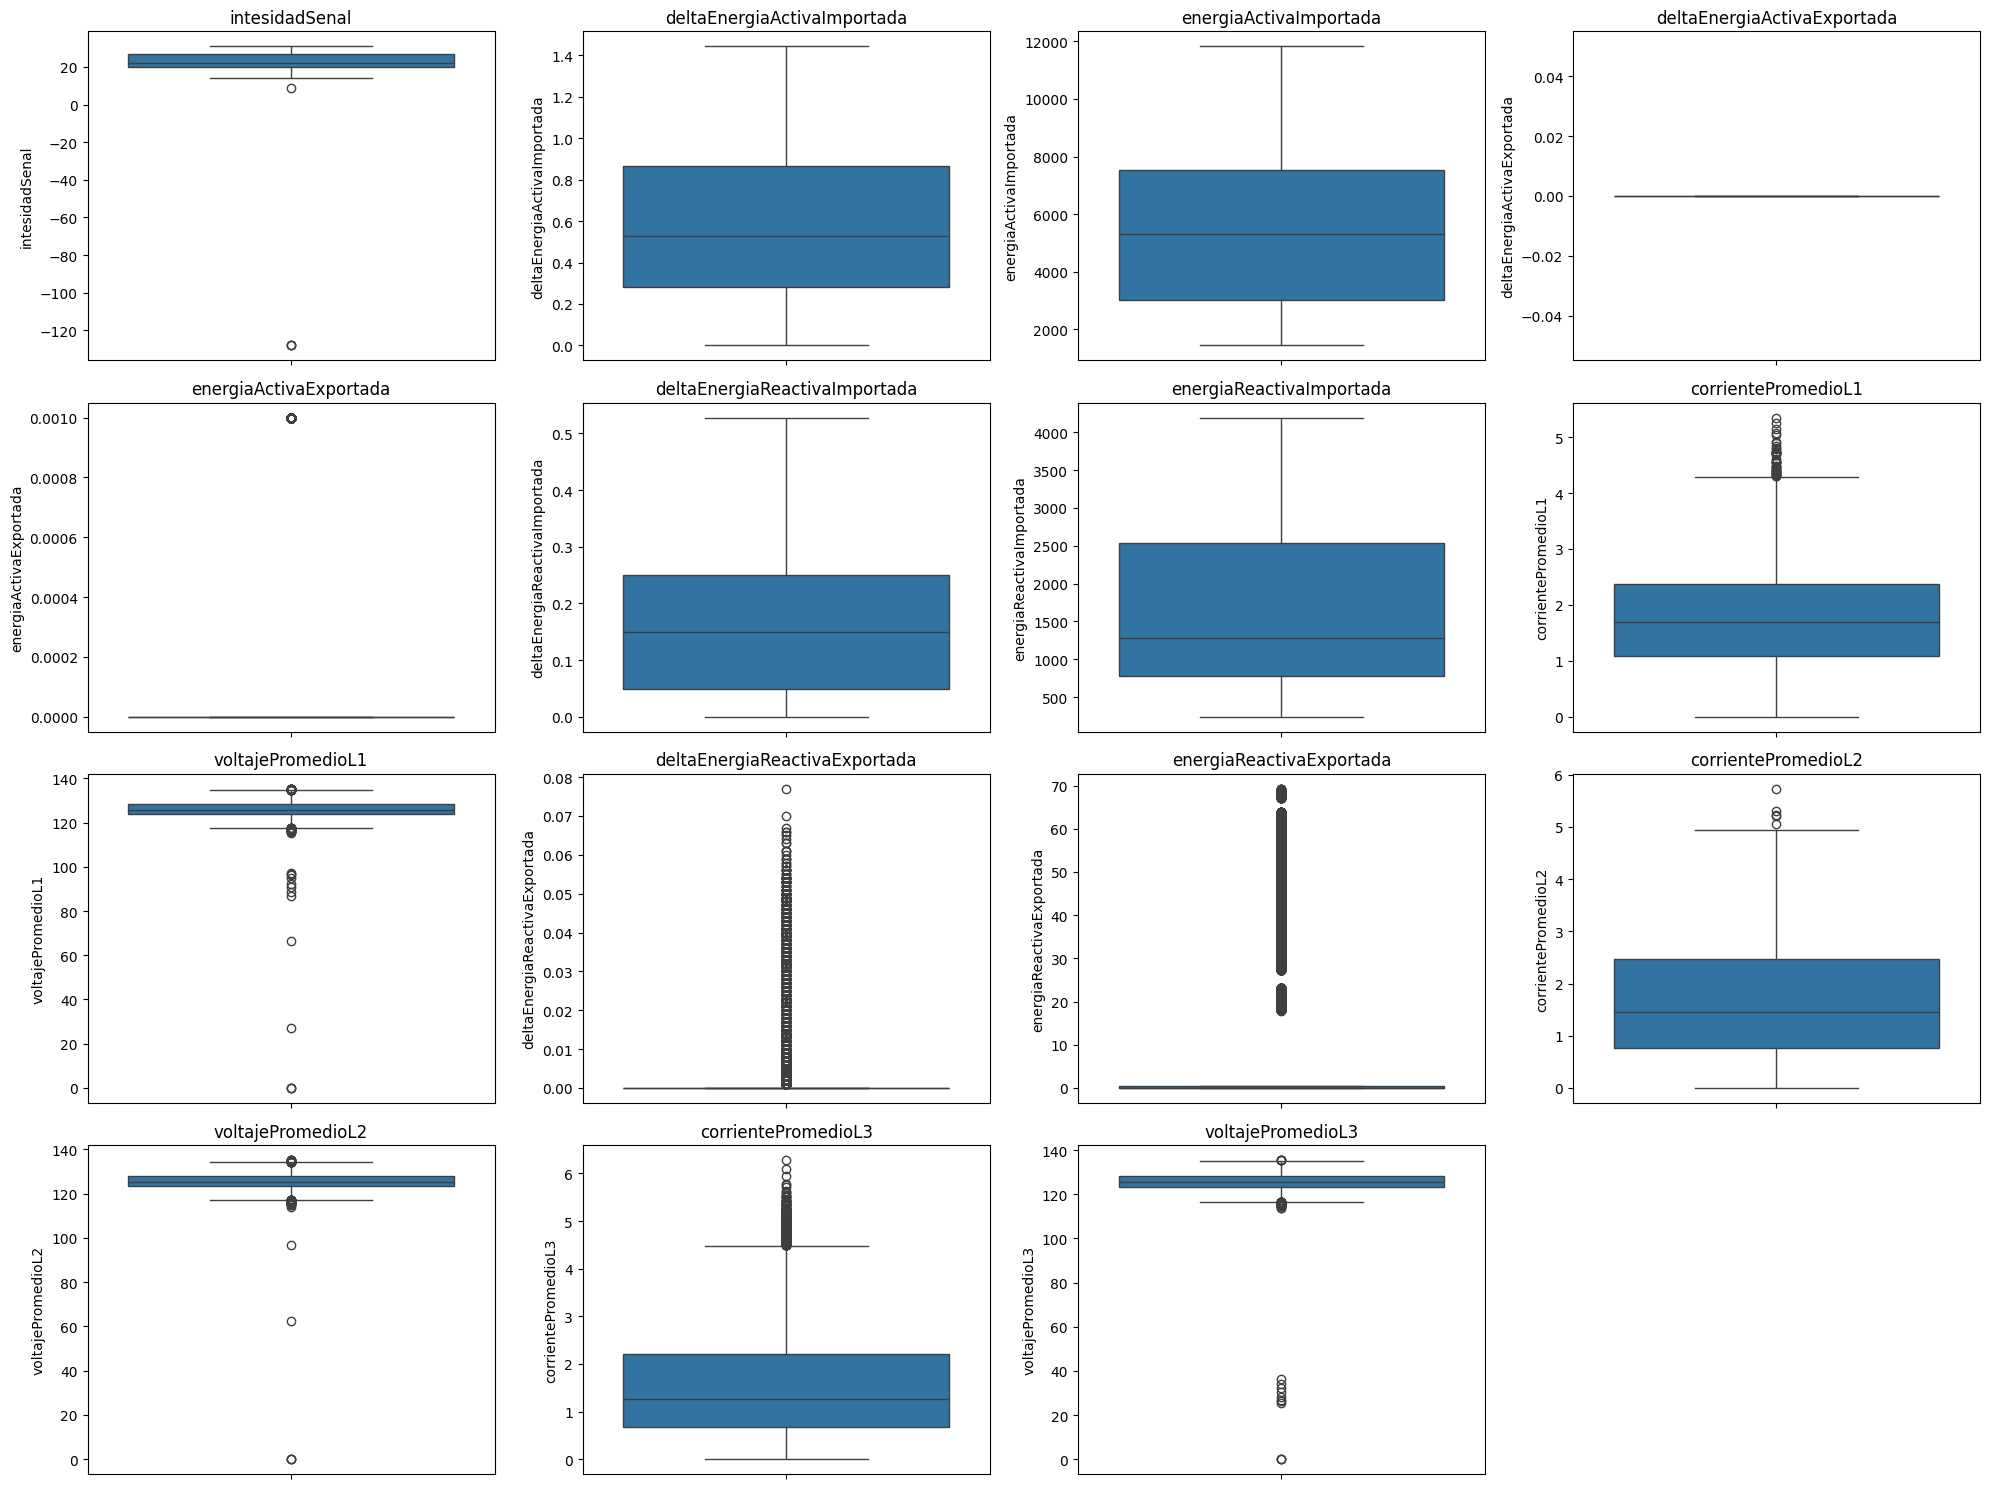

In [26]:

df_aux['intesidadSenal'] = pd.to_numeric(df_aux['intesidadSenal'])
df_aux['deltaEnergiaActivaImportada'] = pd.to_numeric(df_aux['deltaEnergiaActivaImportada'])
df_aux['energiaActivaImportada'] = pd.to_numeric(df_aux['energiaActivaImportada'])
df_aux['deltaEnergiaActivaExportada'] = pd.to_numeric(df_aux['deltaEnergiaActivaExportada'])
df_aux['energiaActivaExportada'] = pd.to_numeric(df_aux['energiaActivaExportada'])
df_aux['deltaEnergiaReactivaImportada'] = pd.to_numeric(df_aux['deltaEnergiaReactivaImportada'])
df_aux['energiaReactivaImportada'] = pd.to_numeric(df_aux['energiaReactivaImportada'])
df_aux['corrientePromedioL1'] = pd.to_numeric(df_aux['corrientePromedioL1'])
df_aux['voltajePromedioL1'] = pd.to_numeric(df_aux['voltajePromedioL1'])
df_aux['deltaEnergiaReactivaExportada'] = pd.to_numeric(df_aux['deltaEnergiaReactivaExportada'])
df_aux['energiaReactivaExportada'] = pd.to_numeric(df_aux['energiaReactivaExportada'])
df_aux['corrientePromedioL2'] = pd.to_numeric(df_aux['corrientePromedioL2'])
df_aux['voltajePromedioL2'] = pd.to_numeric(df_aux['voltajePromedioL2'])
df_aux['corrientePromedioL3'] = pd.to_numeric(df_aux['corrientePromedioL3'])
df_aux['voltajePromedioL3'] = pd.to_numeric(df_aux['voltajePromedioL3'])

plt.figure(figsize=(20, 15))


for i, column in enumerate(df_aux.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Ajusta la cantidad de gráficos por fila según el número de columnas
    sns.boxplot(y=df_aux[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [27]:
#De los boxplot se puede concluir:

#Los clientes del dataset analizado presentan poca energía exportada, esto se traduce en que es una muestra de clientes que no tienen generación o energía fotovoltaica.
#En promedio los clientes prensentan muy poca corriente, anque se ve una cantidad de datos atipicos estós se presentan porque en general los clientes con grandes corrientes son menos 
#frecuente
#Valores atipicos en los voltajes son evidentemente condiciones atipicas, pueden ser anomalías en instalación o el medidor.




<h1>Conclusión Final Análisis Univariable</h1>
<p>La ausencia de datos es un factor evidente de fallas en el sistema, sin embargo; de acuerdo con los ingenieros de operación recomiendan centrarse en un problema específico que de valor agregado a un nuevo ánalisis ya que el sistema transaccional en sí se encuentra ejecutando una serie de mecanismos para recuperar o alertar la ausencia de lecturas</p>
<p>Los outliers en los valores de voltaje no se deben despreciar ni eliminar, se deben revisar si es condición del medidor o de la red de distribución de energía; mecanismos para monitorear este tipo de situaciones es actualmente ya implementada en los sistemas de operación</p>
<p>De acuerdo con el ingeniero de información que se consultó, se decidió centrar el problema en una anomalía díficil de detectar y/o en revisar alguna relación entre la data que se pierde con algun factor demográfico o de topología.</p>

<h1>Preparacion de los datos</h1>

Se va a considerar la columna fecha para tratar el set de datos como una serie de tiempo


In [28]:
df_pivot.set_index('fecha',inplace=True)

In [29]:

df_pivot = df_pivot.sort_index().loc['2024-01-01':'2024-03-01']

In [30]:
df_pivot.tail()



,medidor,puntoMedida,transformador,region,intesidadSenal,deltaEnergiaActivaImportada,energiaActivaImportada,deltaEnergiaActivaExportada,energiaActivaExportada,deltaEnergiaReactivaImportada,energiaReactivaImportada,corrientePromedioL1,voltajePromedioL1,deltaEnergiaReactivaExportada,energiaReactivaExportada,corrientePromedioL2,voltajePromedioL2,corrientePromedioL3,voltajePromedioL3
fecha,,,,,,,,,,,,,,,,,,,
2024-03-01 23:00:00,adc0a7b9,adc0a7b9,7ae70f36,4e15a7ca,28.0,0.829,5912.987,0.0,0.000,0.239,1958.585,2.26,128.6,0.000,0.005,2.07,128.9,1.85,129.1
2024-03-01 23:00:00,ca5405f5,ca5405f5,a1119d11,4e15a7ca,23.0,0.458,3098.813,0.0,0.000,0.159,1006.258,1.34,125.9,0.000,0.005,1.03,125.4,0.92,125.1
2024-03-01 23:00:00,279e5093,279e5093,8ce6d847,4e15a7ca,19.0,0.208,1730.221,0.0,0.001,0.036,305.058,0.84,127.5,0.000,0.346,0.00,126.8,0.71,127.2
2024-03-01 23:00:00,385eae16,385eae16,88559c40,4e15a7ca,27.0,0.595,5309.456,0.0,0.000,0.007,791.154,1.96,131.1,0.001,22.992,1.31,130.9,1.42,131.0
2024-03-01 23:00:00,e167b482,e167b482,4d9e7e1f,4e15a7ca,21.0,0.991,8061.714,0.0,0.000,0.309,2895.439,2.16,124.2,0.000,0.005,2.31,123.6,3.71,122.2


In [31]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7272 entries, 2024-01-01 00:00:00 to 2024-03-01 23:00:00
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   medidor                        7272 non-null   object 
 1   puntoMedida                    7272 non-null   object 
 2   transformador                  7272 non-null   object 
 3   region                         7272 non-null   object 
 4   intesidadSenal                 7206 non-null   float64
 5   deltaEnergiaActivaImportada    7193 non-null   float64
 6   energiaActivaImportada         7272 non-null   float64
 7   deltaEnergiaActivaExportada    7185 non-null   float64
 8   energiaActivaExportada         7197 non-null   float64
 9   deltaEnergiaReactivaImportada  7193 non-null   float64
 10  energiaReactivaImportada       7202 non-null   float64
 11  corrientePromedioL1            7194 non-null   float64
 12  voltajeProme

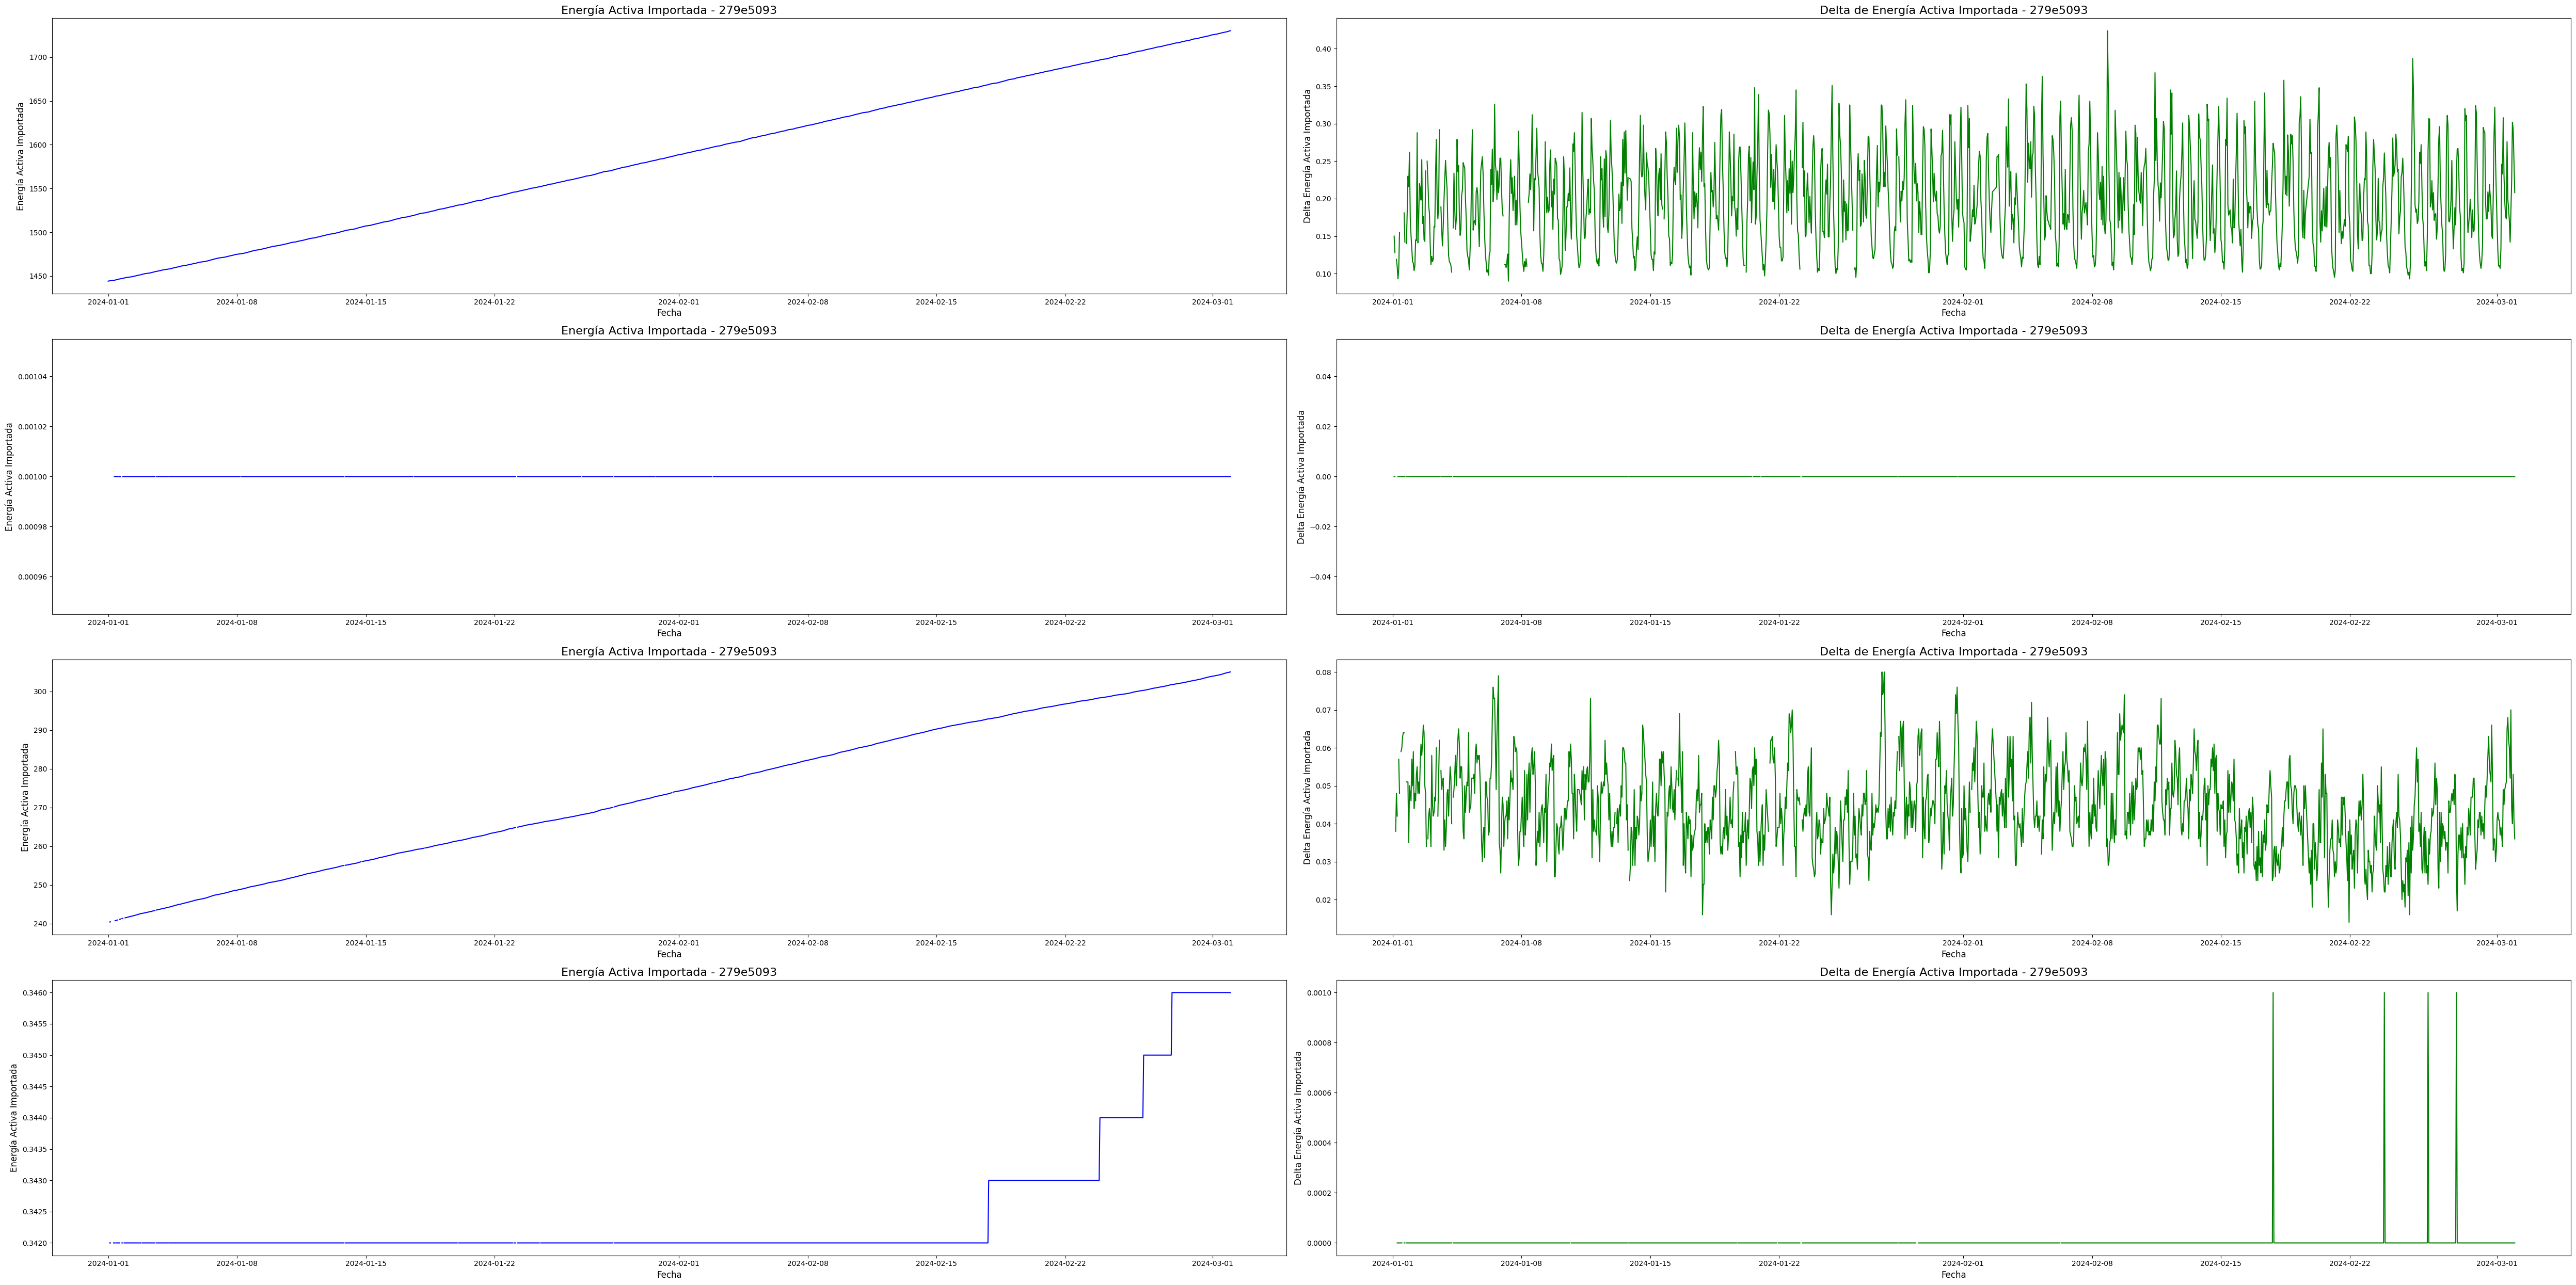

In [32]:
# Selecciona el medidor que deseas graficar
medidor_seleccionado = '279e5093'  # Cambia esto por el nombre de tu medidor

# Filtrar los datos para el medidor seleccionado
datos_medidor = df_pivot[df_pivot['medidor'] == medidor_seleccionado]

# Crear una figura con 2 subplots (uno para cada gráfico)
fig, axs = plt.subplots(4, 2, figsize=(50, 25))

# Gráfico 1: Energía Activa Importada
axs[0,0].plot(datos_medidor.index, datos_medidor['energiaActivaImportada'], '-', color='b')
axs[0,0].set_title(f'Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[0,0].set_xlabel('Fecha', fontsize=12)
axs[0,0].set_ylabel('Energía Activa Importada', fontsize=12)

# Gráfico 2: Delta de Energía Activa Importada
axs[0,1].plot(datos_medidor.index, datos_medidor['deltaEnergiaActivaImportada'], '-', color='g')
axs[0,1].set_title(f'Delta de Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[0,1].set_xlabel('Fecha', fontsize=12)
axs[0,1].set_ylabel('Delta Energía Activa Importada', fontsize=12)

# Gráfico 1: Energía Activa Importada
axs[1,0].plot(datos_medidor.index, datos_medidor['energiaActivaExportada'], '-', color='b')
axs[1,0].set_title(f'Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[1,0].set_xlabel('Fecha', fontsize=12)
axs[1,0].set_ylabel('Energía Activa Importada', fontsize=12)

# Gráfico 2: Delta de Energía Activa Importada
axs[1,1].plot(datos_medidor.index, datos_medidor['deltaEnergiaActivaExportada'], '-', color='g')
axs[1,1].set_title(f'Delta de Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[1,1].set_xlabel('Fecha', fontsize=12)
axs[1,1].set_ylabel('Delta Energía Activa Importada', fontsize=12)


# Gráfico 1: Energía Activa Importada
axs[2,0].plot(datos_medidor.index, datos_medidor['energiaReactivaImportada'], '-', color='b')
axs[2,0].set_title(f'Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[2,0].set_xlabel('Fecha', fontsize=12)
axs[2,0].set_ylabel('Energía Activa Importada', fontsize=12)

# Gráfico 2: Delta de Energía Activa Importada
axs[2,1].plot(datos_medidor.index, datos_medidor['deltaEnergiaReactivaImportada'], '-', color='g')
axs[2,1].set_title(f'Delta de Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[2,1].set_xlabel('Fecha', fontsize=12)
axs[2,1].set_ylabel('Delta Energía Activa Importada', fontsize=12)


# Gráfico 1: Energía Activa Importada
axs[3,0].plot(datos_medidor.index, datos_medidor['energiaReactivaExportada'], '-', color='b')
axs[3,0].set_title(f'Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[3,0].set_xlabel('Fecha', fontsize=12)
axs[3,0].set_ylabel('Energía Activa Importada', fontsize=12)

# Gráfico 2: Delta de Energía Activa Importada
axs[3,1].plot(datos_medidor.index, datos_medidor['deltaEnergiaReactivaExportada'], '-', color='g')
axs[3,1].set_title(f'Delta de Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[3,1].set_xlabel('Fecha', fontsize=12)
axs[3,1].set_ylabel('Delta Energía Activa Importada', fontsize=12)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [33]:
datos_medidor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 2024-01-01 00:00:00 to 2024-03-01 23:00:00
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   medidor                        1456 non-null   object 
 1   puntoMedida                    1456 non-null   object 
 2   transformador                  1456 non-null   object 
 3   region                         1456 non-null   object 
 4   intesidadSenal                 1442 non-null   float64
 5   deltaEnergiaActivaImportada    1437 non-null   float64
 6   energiaActivaImportada         1456 non-null   float64
 7   deltaEnergiaActivaExportada    1441 non-null   float64
 8   energiaActivaExportada         1437 non-null   float64
 9   deltaEnergiaReactivaImportada  1436 non-null   float64
 10  energiaReactivaImportada       1436 non-null   float64
 11  corrientePromedioL1            1437 non-null   float64
 12  voltajeProme

In [34]:
# Usar .loc[] para asignar de forma segura a una columna
datos_medidor = datos_medidor.copy()  # Si es un subconjunto, primero crea una copia
datos_medidor.loc[:, 'deltaEnergiaActivaImportada_calculado'] = datos_medidor['energiaActivaImportada'].diff()


datos_medidor = datos_medidor.drop(datos_medidor.index[0])



In [35]:
datos_medidor.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455 entries, 2024-01-01 01:00:00 to 2024-03-01 23:00:00
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   medidor                                1455 non-null   object 
 1   puntoMedida                            1455 non-null   object 
 2   transformador                          1455 non-null   object 
 3   region                                 1455 non-null   object 
 4   intesidadSenal                         1442 non-null   float64
 5   deltaEnergiaActivaImportada            1436 non-null   float64
 6   energiaActivaImportada                 1455 non-null   float64
 7   deltaEnergiaActivaExportada            1440 non-null   float64
 8   energiaActivaExportada                 1436 non-null   float64
 9   deltaEnergiaReactivaImportada          1435 non-null   float64
 10  energiaReactivaImportada            

Text(0, 0.5, 'Delta Energía Activa Importada')

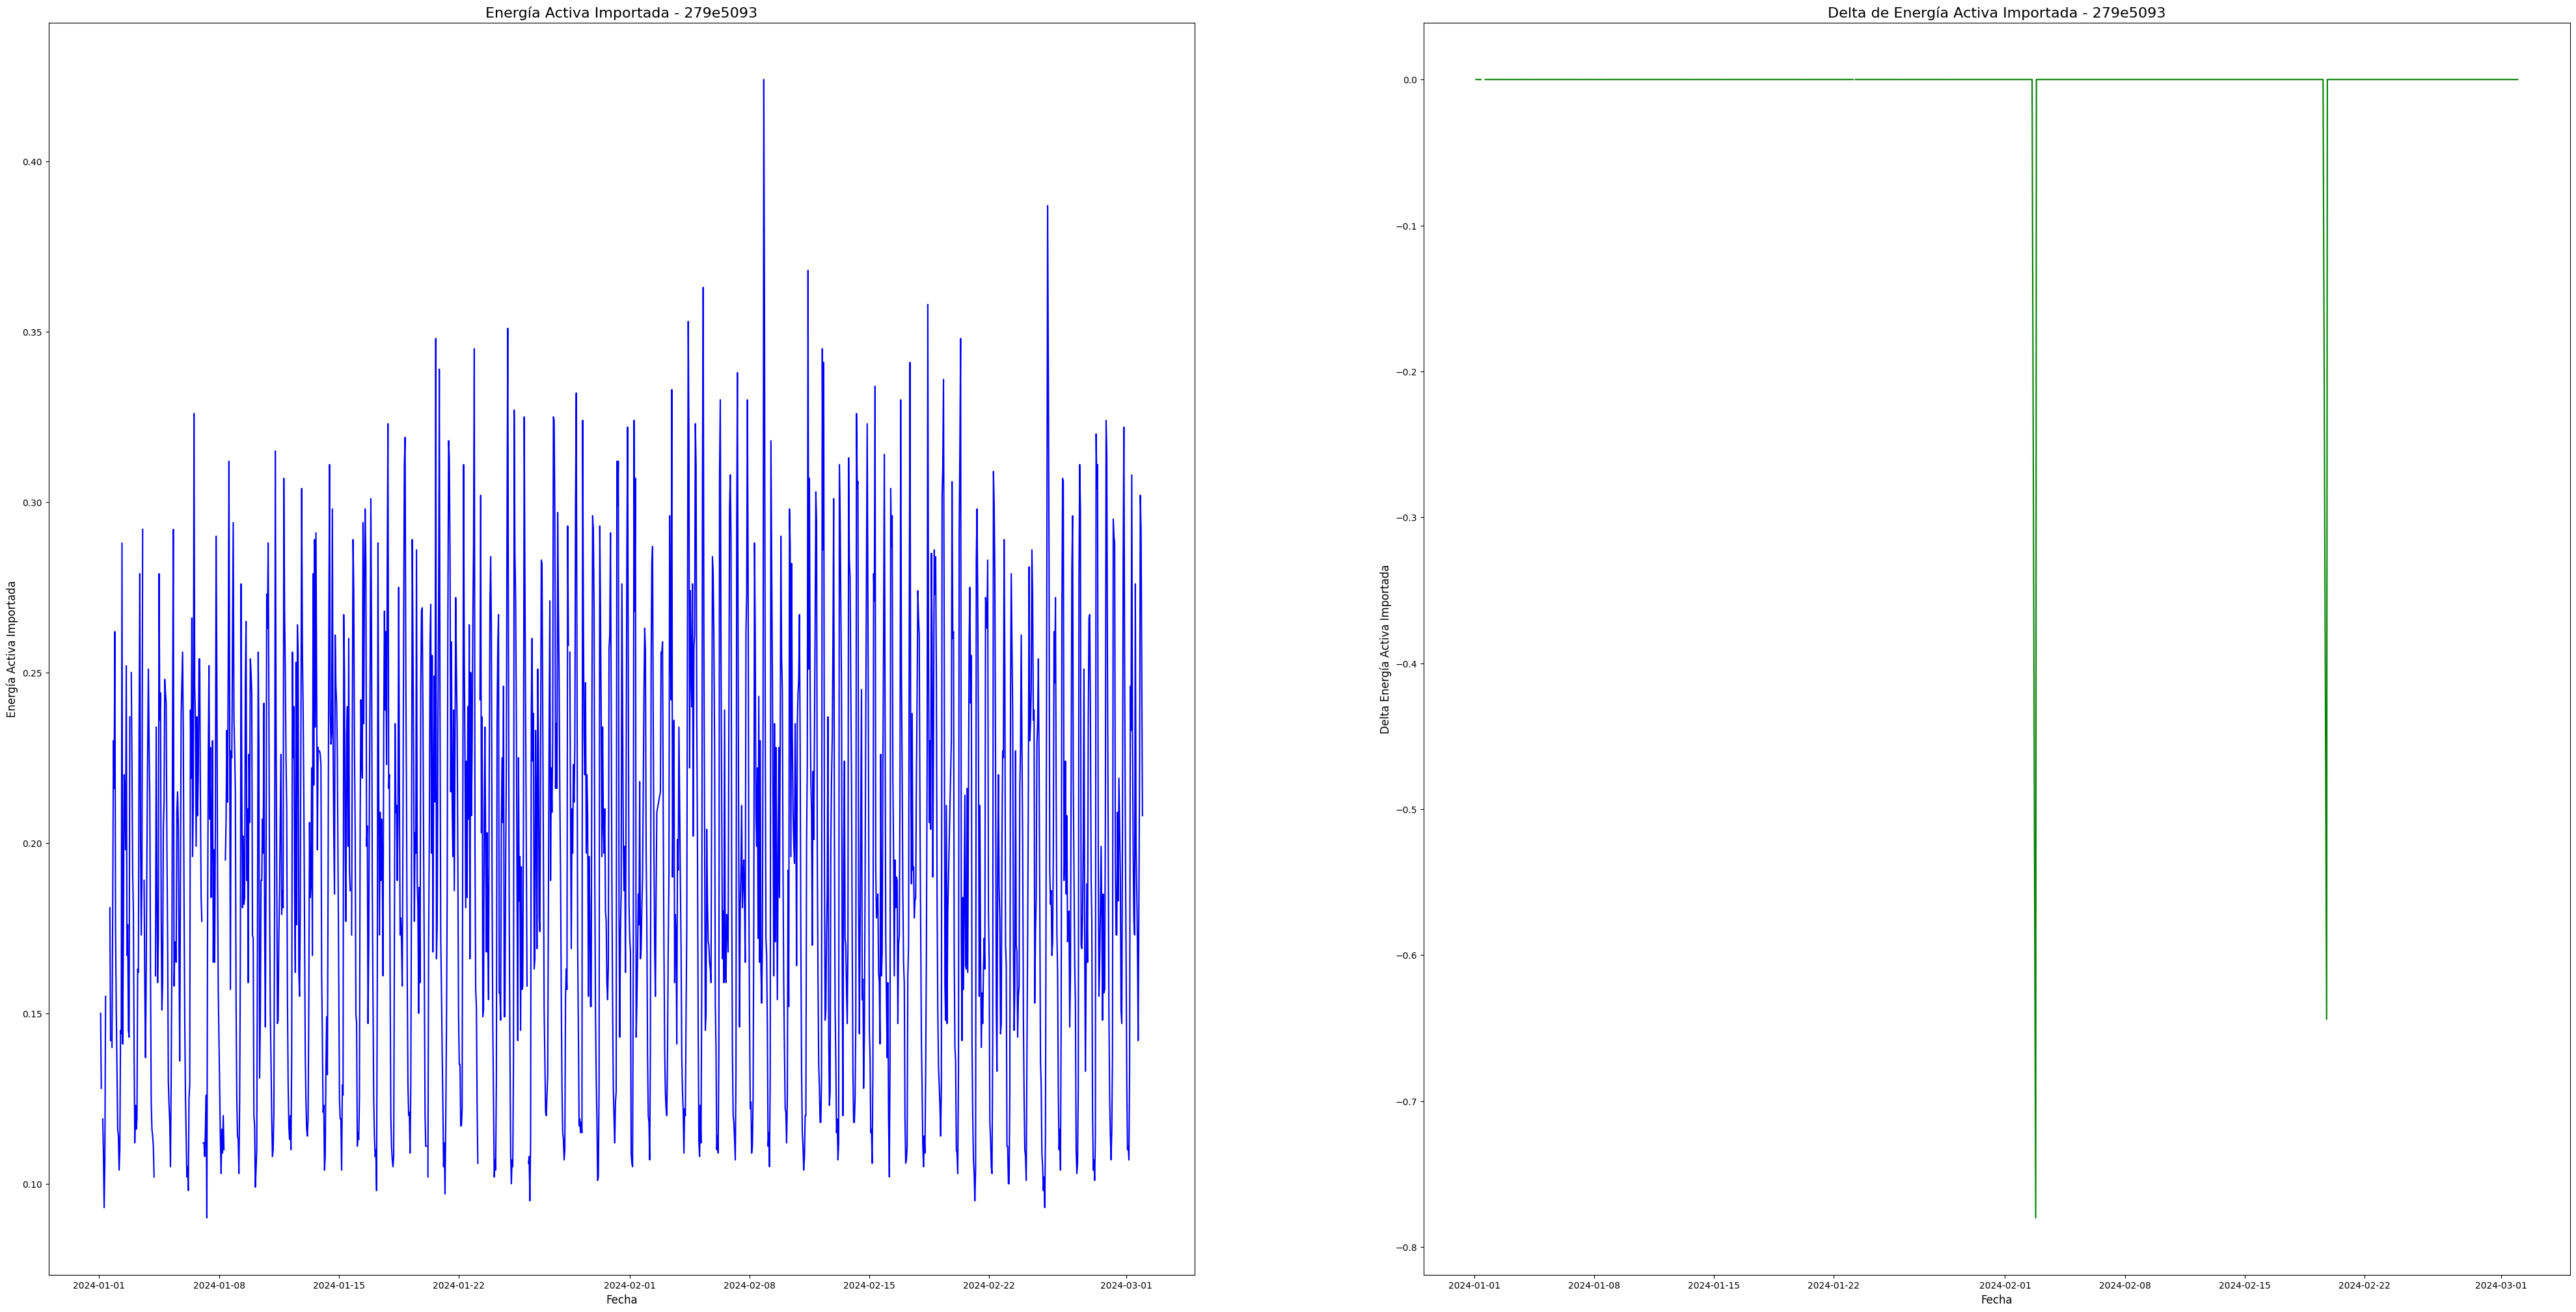

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(50, 25))

# Gráfico 1: Energía Activa Importada
axs[0].plot(datos_medidor.index, datos_medidor['deltaEnergiaActivaImportada'], '-', color='b')
axs[0].set_title(f'Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[0].set_xlabel('Fecha', fontsize=12)
axs[0].set_ylabel('Energía Activa Importada', fontsize=12)

# Gráfico 2: Delta de Energía Activa Importada
axs[1].plot(datos_medidor.index, datos_medidor['deltaEnergiaActivaImportada'] - datos_medidor['deltaEnergiaActivaImportada_calculado'], '-', color='g')
axs[1].set_title(f'Delta de Energía Activa Importada - {medidor_seleccionado}', fontsize=16)
axs[1].set_xlabel('Fecha', fontsize=12)
axs[1].set_ylabel('Delta Energía Activa Importada', fontsize=12)


In [37]:
# Crear un nuevo DataFrame con el índice de fechas y la columna 'deltaEnergiaActivaImportada_calculado'
curva_energia = datos_medidor[['deltaEnergiaActivaImportada_calculado']].copy()

curva_energia['fecha'] = datos_medidor.index.copy()
# Asegurarte de que el índice sea de tipo datetime (si aún no lo es)
#curva_energia.index = pd.to_datetime(datos_medidor.index)


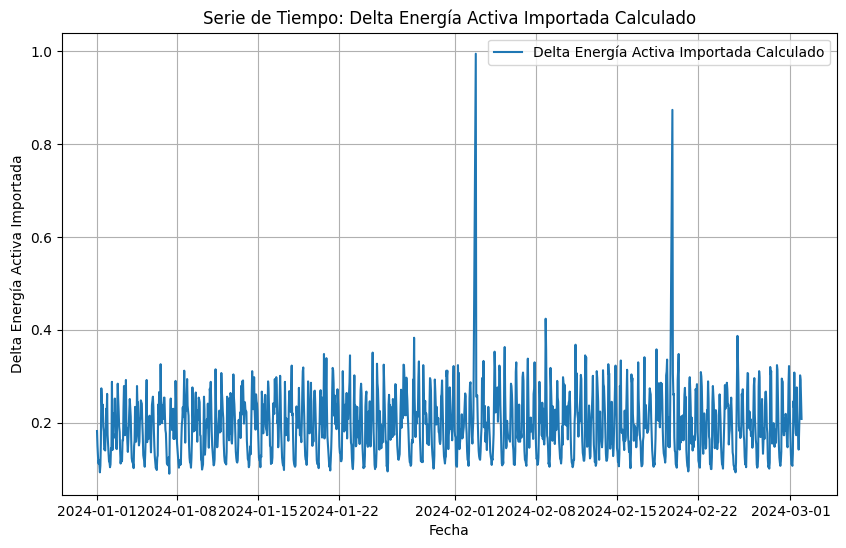

In [38]:
# Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(curva_energia.index, curva_energia['deltaEnergiaActivaImportada_calculado'], label='Delta Energía Activa Importada Calculado')

# Añadir título y etiquetas
plt.title('Serie de Tiempo: Delta Energía Activa Importada Calculado')
plt.xlabel('Fecha')
plt.ylabel('Delta Energía Activa Importada')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

<Figure size 20000x10000 with 0 Axes>

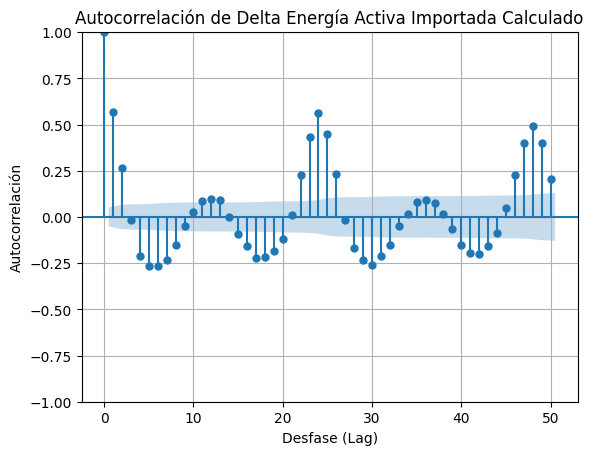

In [39]:
# Graficar la autocorrelación
plt.figure(figsize=(200, 100))
plot_acf(curva_energia['deltaEnergiaActivaImportada_calculado'], lags=50)  # Puedes ajustar el número de lags
plt.title('Autocorrelación de Delta Energía Activa Importada Calculado')
plt.xlabel('Desfase (Lag)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

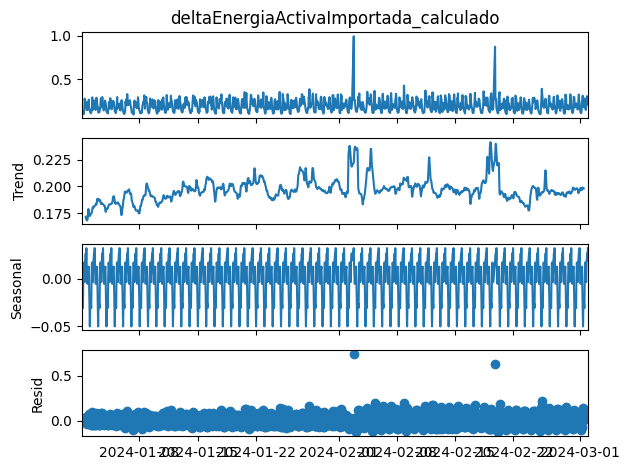

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie de tiempo
result = seasonal_decompose(curva_energia['deltaEnergiaActivaImportada_calculado'], model='additive', period=24)
result.plot()
plt.show()


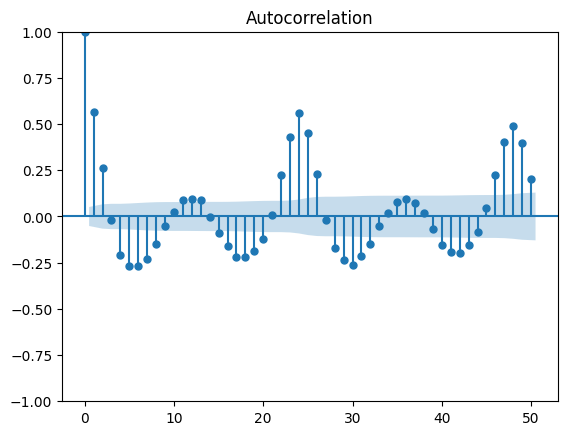

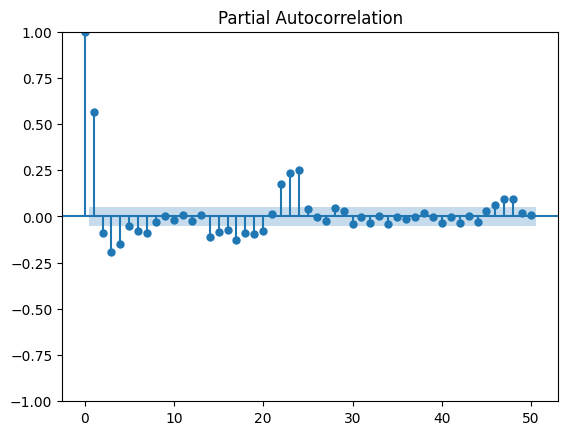

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráfico de autocorrelación
plot_acf(curva_energia['deltaEnergiaActivaImportada_calculado'], lags=50)
plt.show()

# Gráfico de autocorrelación parcial
plot_pacf(curva_energia['deltaEnergiaActivaImportada_calculado'], lags=50)
plt.show()


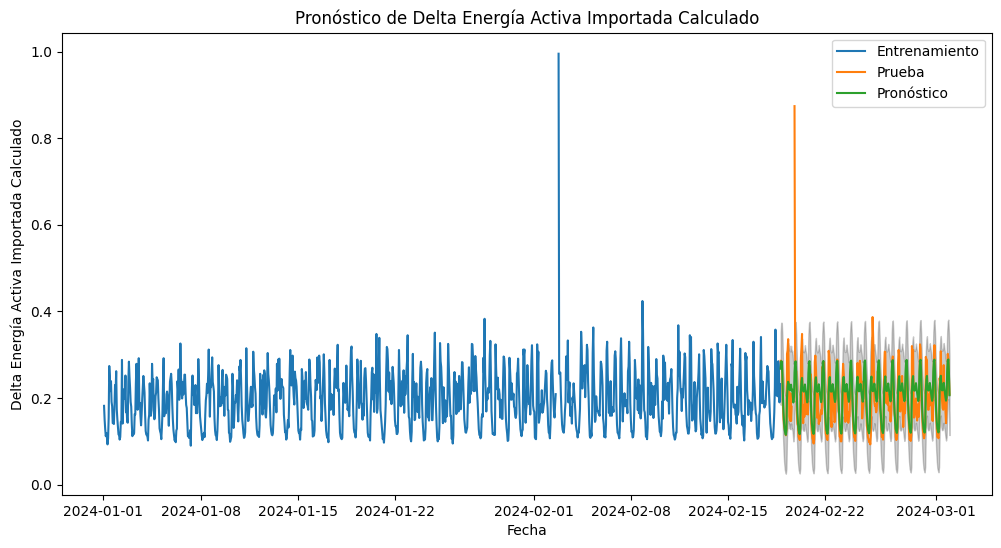

In [42]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


curva_energia = curva_energia.asfreq('h')


# Definir el punto de corte
train_size = int(len(curva_energia) * 0.8)
train, test = curva_energia.iloc[:train_size], curva_energia.iloc[train_size:]

# Ajustar el modelo SARIMA en el conjunto de entrenamiento
model = SARIMAX(train['deltaEnergiaActivaImportada_calculado'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit()

# Pronóstico en el conjunto de prueba
forecast = results.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['deltaEnergiaActivaImportada_calculado'], label='Entrenamiento')
plt.plot(test.index, test['deltaEnergiaActivaImportada_calculado'], label='Prueba')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Pronóstico')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Pronóstico de Delta Energía Activa Importada Calculado')
plt.xlabel('Fecha')
plt.ylabel('Delta Energía Activa Importada Calculado')
plt.legend()
plt.show()



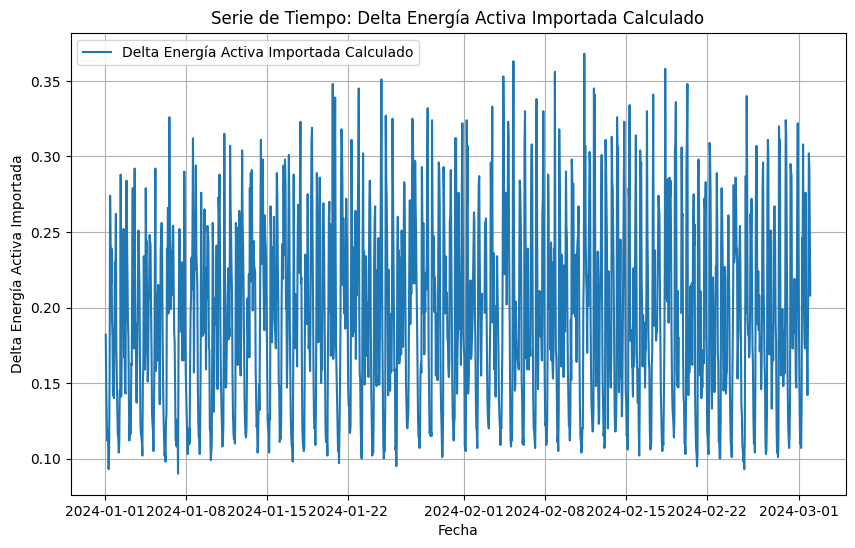

In [43]:



# Calcular el IQR
Q1 = curva_energia['deltaEnergiaActivaImportada_calculado'].quantile(0.25)
Q3 = curva_energia['deltaEnergiaActivaImportada_calculado'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = (curva_energia['deltaEnergiaActivaImportada_calculado'] < lower_bound) | (curva_energia['deltaEnergiaActivaImportada_calculado'] > upper_bound)

# Calcular la media de la columna
mean_value = curva_energia['deltaEnergiaActivaImportada_calculado'].mean()

# Reemplazar los valores atípicos por la media
curva_energia.loc[outliers, 'deltaEnergiaActivaImportada_calculado'] = mean_value

plt.figure(figsize=(10, 6))
plt.plot(curva_energia.index, curva_energia['deltaEnergiaActivaImportada_calculado'], label='Delta Energía Activa Importada Calculado')

# Añadir título y etiquetas
plt.title('Serie de Tiempo: Delta Energía Activa Importada Calculado')
plt.xlabel('Fecha')
plt.ylabel('Delta Energía Activa Importada')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


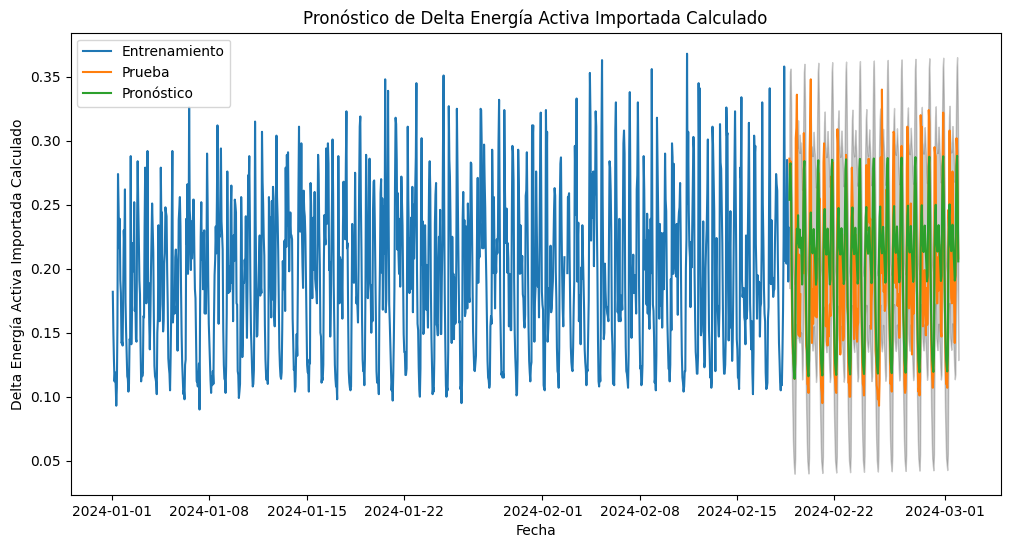

In [44]:
# Definir el punto de corte
train_size = int(len(curva_energia) * 0.8)
train, test = curva_energia.iloc[:train_size], curva_energia.iloc[train_size:]

# Ajustar el modelo SARIMA en el conjunto de entrenamiento
model = SARIMAX(train['deltaEnergiaActivaImportada_calculado'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit()

# Pronóstico en el conjunto de prueba
forecast = results.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['deltaEnergiaActivaImportada_calculado'], label='Entrenamiento')
plt.plot(test.index, test['deltaEnergiaActivaImportada_calculado'], label='Prueba')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Pronóstico')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Pronóstico de Delta Energía Activa Importada Calculado')
plt.xlabel('Fecha')
plt.ylabel('Delta Energía Activa Importada Calculado')
plt.legend()
plt.show()

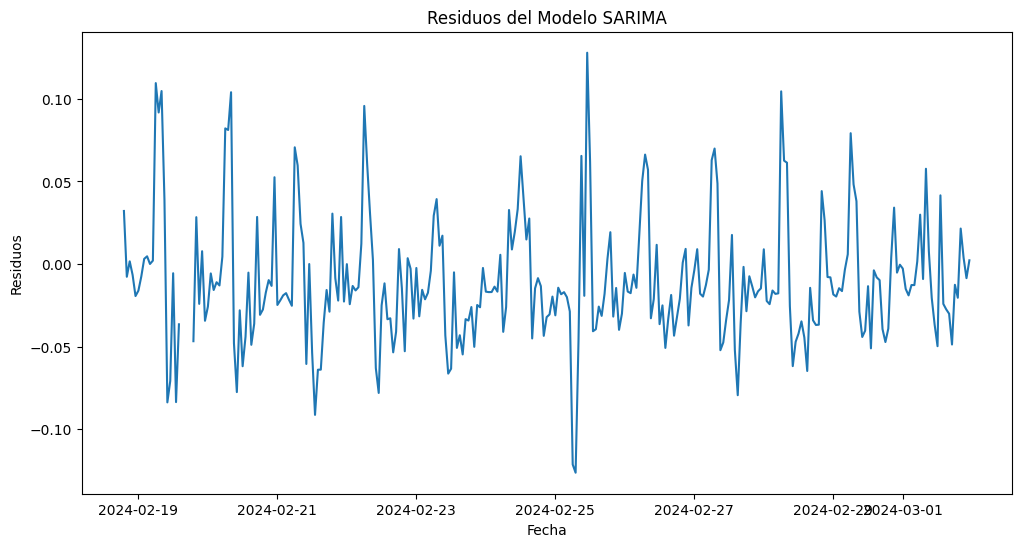

In [45]:
residuals = test['deltaEnergiaActivaImportada_calculado'] - forecast.predicted_mean
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del Modelo SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.show()



In [46]:
mape = np.mean(np.abs((test['deltaEnergiaActivaImportada_calculado'] - forecast.predicted_mean) / test['deltaEnergiaActivaImportada_calculado'])) * 100
print(f'MAPE: {mape}%')


MAPE: 16.88679403349051%


<h2>Bibliografía</h2>

<ol>
  <li>Notas y material de clase, Curso EDA, Maestría CD. Universidad Icesi</li>
  <li>Trabajo de grado "CLASIFICACIÓN DE IMÁGENES VISUALES A TRAVÉS DE SEÑALESELECTROENCEFALOGRÁFICAS (EEG) PARA UNA INTERFAZ CEREBRO COMPUTADOR", Christian Rosero, Universidad del Valle, 2021</li>
  <li>Notebook : <a href="https://github.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/blob/main/Caso%20estudio%3Aadidas_sales_forecasting_Statsforecast.ipynb">Caso estudio Aadidas_sales_forecasting_Statsforecast.ipynb</a> </li>
  <li>Notebook : <a href="https://github.com/narencastellon/Serie-de-tiempo-con-Machine-Learning/blob/main/Modulo%20time-series-anomaly-detection-con-isolation-forest.ipynb">Modulo time-series-anomaly-detection-con-isolation-forest.ipynb </a></li>
  <li>Notebook : <a href="https://github.com/comodoro180/ICESI_MCD/blob/main/AnalisisExploratorioDatos/Unidad_3/Pronostico_Producion_MuestrasMedicas_ST.ipynb">Pronostico_Producion_MuestrasMedicas_ST.ipynb</a></li>
  <li>Webpage : <a href="https://cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn">https://cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn</a></li>
</ol>